# CSCI2000U Scientific Data Analysis
###### **Name:** Smit Kalathia **ID:** 100871659

## Exploration and Analysis of the Top Subscribed Youtubers

### Introduction

To identify trends and patterns across various channel metrics, this analysis examines a dataset that includes the 1000 most subscribed YouTube channels. The dataset offers a comprehensive view of subscribers, views, categories, and other significant components. The dataset, obtained from the Kaggle source [https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-Dataset-channels] sheds insight on the constantly changing world of content creation.

#### Why did I Choose this Dataset?
I grew up with dreams and aspirations of becoming a YouTuber, however, I was always apprehensive to start because of a fear of failure. I analyzed this dataset to explore the variety of top subscribed YouTubers further. 10 Years ago, if someone were to mention dreaming of becoming a YouTuber they would get laughed at, however now it's become a more common and respected occupation. Today’s kids are three times more likely to aspire toward a career as a YouTuber rather than an astronaut. That's why going more in-depth and analyzing the top subscribed YouTubers, will help give a better understanding of what one can do in order to climb the total subscriber rankings. A thorough data analysis will help YouTubers grow by providing insight into the top subscribed YouTubers.


### Questions to further Analyze:
#####  **1.  Figuring out the most Popular category/genre for Youtubers**
###### **1.1 Which category/genre correlates to the most average and most total YouTube subscribers?**
###### **1.2 Which category/genre is the Most efficient in terms of Views per video?**
###### **1.3 Which category/genre is the most effective in terms of Total views?**


#####  **2.  Is it too late to create a channel and become a top subscribed channel?**
###### **2.1 Average Subscribers by Year Started**
###### **2.2 Number of Channels Created each Year**

--------------------------------------------------------------------
#### **Importing libraries**

In [1366]:
import pandas as pd
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------
#### **Printing the Dataset**
I read the dataset and printed the first 5 and last 5 rows of the dataset. This also includes the total number of rows and columns

In [1367]:

# Read the dataset into a DataFrame
Dataset = pd.read_csv('topSubscribed.csv')
# Prints the first and last 5 rows of the dataset
Dataset

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015


-------------------------------------------------------------------------------------------------------------------------------------------------

#### **Data Cleaning**
I cleaned the numeric columns, and converted them to floating point numbers and then to integers. I also dropped the rows of the dataset which included channels owned by the company youtube (0 video uploads and views)as well as I dropped any duplicated rows. I dropped the 'Youtube' Youtube channel since it showed it was created before the birth of youtube (2005) and was prooving to be an outlier in the data set for the date created. I printed the info of the dataset to make sure no null values were still included in the cleaned dataset.  I replaced the category name for several channels which was "https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels" to variety to make it easier to view. Lastly I printed the 5 first and last rows of the cleaned dataset to view the changes

In [1368]:
# Clean columns, convert to numeric and also handle issues with commas
Dataset['Subscribers'] = Dataset['Subscribers'].str.replace(',','').astype(float).astype("int64")
Dataset['Video Views'] = Dataset['Video Views'].str.replace(',','').astype(float).astype("int64")
Dataset['Video Count'] = Dataset['Video Count'].str.replace(',','').astype(float).astype("int64")

# drops the rows of Dataset channels with 0 video views or 0 video count (channels owned by youtube)
Dataset = Dataset[(Dataset['Video Views'] != 0)| (Dataset['Video Count'] != 0)]
# done this to avoid SettingWithCopyWarning
Dataset = Dataset.copy()
Dataset['Started'] = pd.to_datetime(Dataset['Started'], format='%Y')



# Filter out rows with 'Started' before 2003
Dataset = Dataset[Dataset['Started'].dt.year >= 2004]

# drops rows of dataset that are the exact same values
Dataset = Dataset.drop_duplicates()
# make sure no null values in the dataset
Dataset.info()
# Replaces the category of youtubers that are mentioned under the 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels' category to 'variety' in the Category column
Dataset.loc[Dataset['Category'] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', 'Category'] = 'Variety'

print(Dataset.shape)

# Display the first 5 and last 5 rows of the cleaned dataset
Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             990 non-null    int64         
 1   Youtube Channel  990 non-null    object        
 2   Subscribers      990 non-null    int64         
 3   Video Views      990 non-null    int64         
 4   Video Count      990 non-null    int64         
 5   Category         990 non-null    object        
 6   Started          990 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 61.9+ KB
(990, 7)


,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006-01-01
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006-01-01
3,4,SET India,150000000,137828094104,103200,Shows,2006-01-01
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012-01-01
6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010-01-01
...,...,...,...,...,...,...,...
995,996,XO TEAM,11500000,11471384709,2679,People & Blogs,2021-01-01
996,997,Nirahua Music World,11500000,5997717755,788,Music,2014-01-01
997,998,YtCrash,11400000,3825084,1,Education,2015-01-01
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015-01-01


---------------------------------------------------------------------------------------------------------------------------------------------
#### **Data description**

I printed the data description to see the count, mean, standard deviation, min, max, and the quartiles of each column in the cleaned dataset. This helps understand the range and the spread of the data.

In [1369]:
Dataset.describe()

,Rank,Subscribers,Video Views,Video Count
count,990.000000,9.900000e+02,9.900000e+02,990.000000
mean,503.268687,2.119838e+07,1.009286e+10,9510.715152
std,287.359973,1.553383e+07,1.303395e+10,32339.424809
min,1.000000,1.140000e+07,4.390980e+05,1.000000
25%,255.250000,1.332500e+07,3.964725e+09,379.500000
50%,503.500000,1.660000e+07,6.775084e+09,911.500000
75%,751.750000,2.297500e+07,1.227083e+10,3323.500000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000


-------------------------------------------------------------------------------------------------------------------------------------------------
#### 1.1 Average Subscribers per Category
This Graph shows the category with the most subscribers averaged from the top 1000th most subscribed youtube channels are Trailers and Shows. It also shows on average pets and animals and travel and events based youtube channels dont have as many subscribers per channel comparitively to the other categories

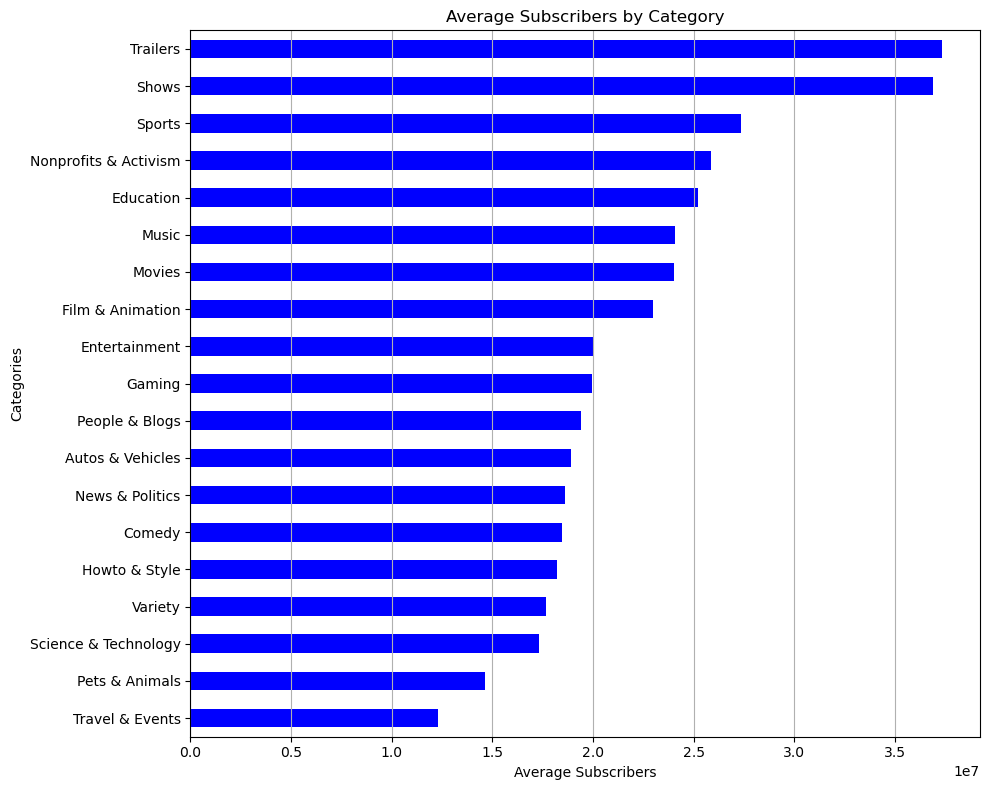

In [1370]:

# Group by genre and calculate the mean subscribers
subscribers_by_genre = Dataset.groupby('Category')['Subscribers'].mean().sort_values()

# Plotting the relationship between genre and average subscribers
plt.figure(figsize=(10, 8))
subscribers_by_genre.plot(kind='barh', color='blue')
plt.xlabel('Average Subscribers')
plt.title('Average Subscribers by Category')
plt.ylabel('Categories')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------
#### 1.1 Total Subscribers per Category
The graph shows Music and entertainment are the categories with the most total subscribers of the top 1000 youtube channels. On the flip side, Auto and vehicles and Travel and events have the least subscribers. 

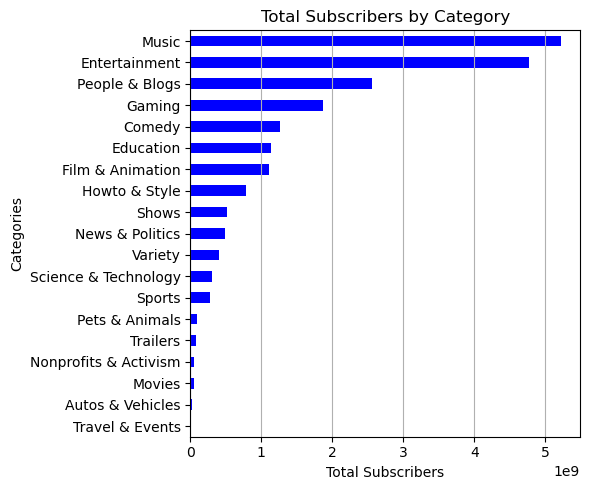

In [1371]:


# Group by category and calculate the total subscribers
total_subscribers = Dataset.groupby('Category')['Subscribers'].sum().sort_values()

# Plotting the relationship between category and total subscribers
plt.figure(figsize=(6, 5))
total_subscribers.plot(kind='barh', color='blue')
plt.xlabel('Total Subscribers')
plt.title('Total Subscribers by Category')
plt.ylabel('Categories')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------
#### 1.2 - Video category Efficiency
This graph shows the average views per video each category would receive. In this case Music youtube channels provide the most average views per single videos by a landslide. However Nonprofits and activism channels receive the lease views per video.

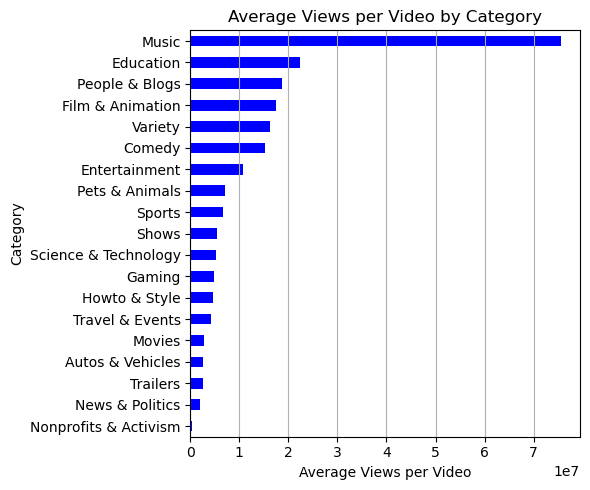

In [1372]:
# Calculates the views per video
Dataset['Views per Video'] = Dataset['Video Views'] / Dataset['Video Count']
# Calculate average views per video by genre/category
avg_views_per_video_genre = Dataset.groupby('Category')['Views per Video'].mean().sort_values()


# Plotting the bar graph
plt.figure(figsize=(6, 5))
avg_views_per_video_genre.plot(kind='barh', color='blue')
plt.xlabel('Average Views per Video')
plt.title('Average Views per Video by Category')
plt.ylabel('Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------
#### 1.3 - Video category effectivness
This graph shows the total views received by each category. It shows that the category of shows is the most popular since its the most viewed and travel and events the least popular.

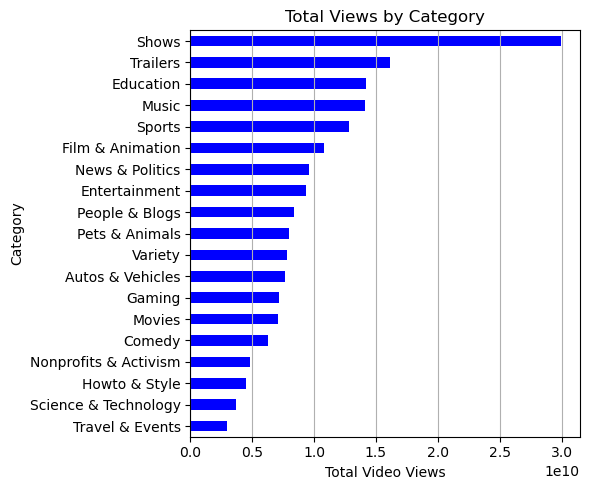

In [1373]:


# Calculate average views per video by genre/category
total_views_by_genre = Dataset.groupby('Category')['Video Views'].mean().sort_values()

# Plotting the bar graph
plt.figure(figsize=(6, 5))
total_views_by_genre.plot(kind='barh', color='blue')
plt.xlabel('Total Video Views')
plt.title('Total Views by Category')
plt.ylabel('Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------
#### 2.1 Average Subscribers by Year Started
This graph shows the average subscribers by years. It shows that the newer channels have lower subscribers and as years go, the average subscribers will increase. This shows that newer youtube channels are taking over the space as their is a clutter of newer channels.

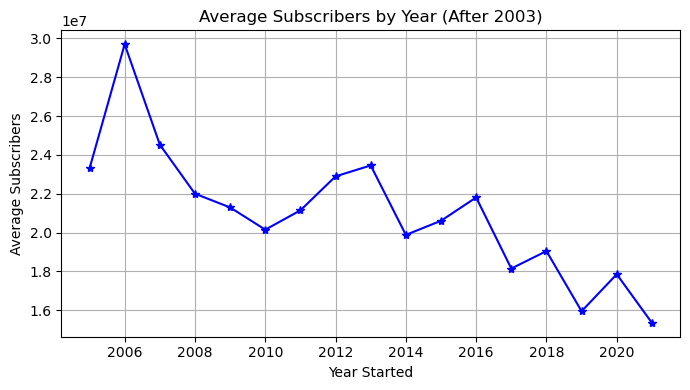

In [1374]:


# Group by year and calculate average subscribers
average_subs_per_year = df_filtered.groupby(df_filtered['Started'].dt.year)['Subscribers'].mean()
average_subs_per_year = average_subs_per_year.sort_index()

# Plotting the line graph
plt.figure(figsize=(7, 4))
average_subs_per_year.plot(marker='*', color='blue')
plt.xlabel('Year Started')
plt.ylabel('Average Subscribers')
plt.title('Average Subscribers by Year (After 2003)')
plt.grid()
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------
#### 2.2 Number of Channels Created each Year
This graph shows the number of channels created in each year. This graph also shows that newer youtube channels are taking over the space as their is a clutter of newer channels. This graph proves that as years go by, newer channels will be gaining more subscribers and will be enetering the top 1000 most subscribed channels.

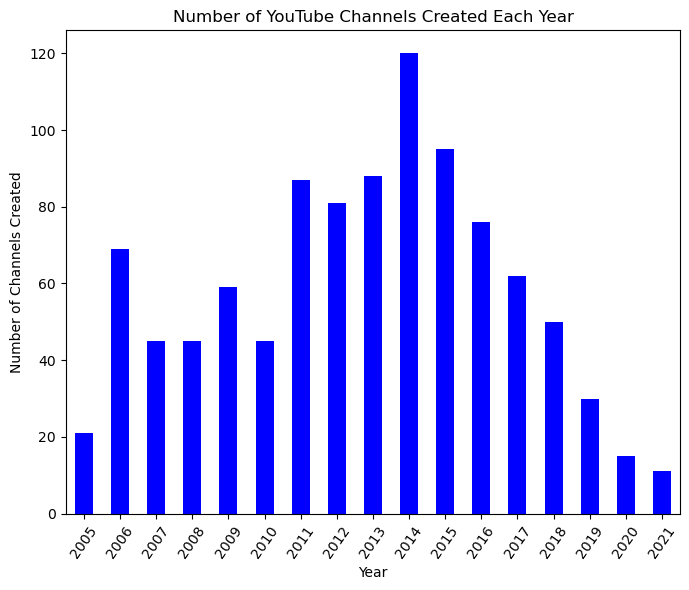

In [1375]:

#Finds out how many channels were created on each year
channels_per_year = df_filtered['Started'].dt.year.value_counts().sort_index()

#plotting the bar graph
plt.figure(figsize=(7, 6))
channels_per_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.title('Number of YouTube Channels Created Each Year')
#rotates the x axis text to be more readable 
plt.xticks(rotation=55)  
plt.tight_layout()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------
#### **Conclusion**
##### Through the thorough Data analysis, we can come to a conclusion for the each question/topic explored. Channels should avoid creating videos on travel and events and non-profits and activism as they prove to generate the least amount of subscribers and views. The most popular category for youtube channels to focus on would have to be either creating shows which are the most viewed in total or creating music which are the most viewed per video. If you are planning on creating loads of videos with thoughts of quantity over quality, you should focus in creating shows as they are the most viewed. Alternatively you could create quality music videos which are proven to have the most average views per video. If you want go get up the ranking of subscribers with less regard on views per video, making videos on entertainment is the way to go. Overall it is not too late to create a channel because the dataset and graphs prove that newer youtube channels are taking over the top 1000 as their is a clutter of newer channels. The most subscribed youtube channels are from the year 2014, and as time goes that year will also be increasing. Despite the heavy competition in the field, there's an increasing trend in the number of channels being created, which will ultimately mean graphs 2.1 and 2.2 will become even more left skewed with an increase of newer created channels in the top 1000 most subscribed.


##### **Resources:**
###### https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
###### https://www.cnbc.com/2019/07/19/more-children-dream-of-being-youtubers-than-astronauts-lego-says.html
###### https://saturncloud.io/blog/rotate-tick-labels-in-subplot-using-pyplot-matplotlib-and-gridspec/
###### https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-Dataset-channels